1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

2) Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.

# Step 1 importing the Packages

In [1]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# Shape of the dataset

In [5]:
df.shape

(1000, 8)

# Data Checks to perform
Check Missing values ,
Check Duplicates ,
Check data type ,
Check the number of unique values of each  ,
Check statistics of data set ,
Check various categories present in the different categorical column

In [6]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
#Finding the categorical columns
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
print("1) Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("2) Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("3) Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("4) Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("5) Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

1) Categories in 'gender' variable:      ['female' 'male']
2) Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
3) Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
4) Categories in 'lunch' variable:      ['standard' 'free/reduced']
5) Categories in 'test preparation course' variable:      ['none' 'completed']


In [13]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


# Adding columns for "Total Score" and "Average"

In [14]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [16]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


**Insights**
* From above values we get students have performed the worst in Maths
* Best performance is in reading section

# Exploring Data ( Visualization )

**Visualize average score distribution to make some conclusion.**
* Histogram
* Kernel Distribution Function (KDE)

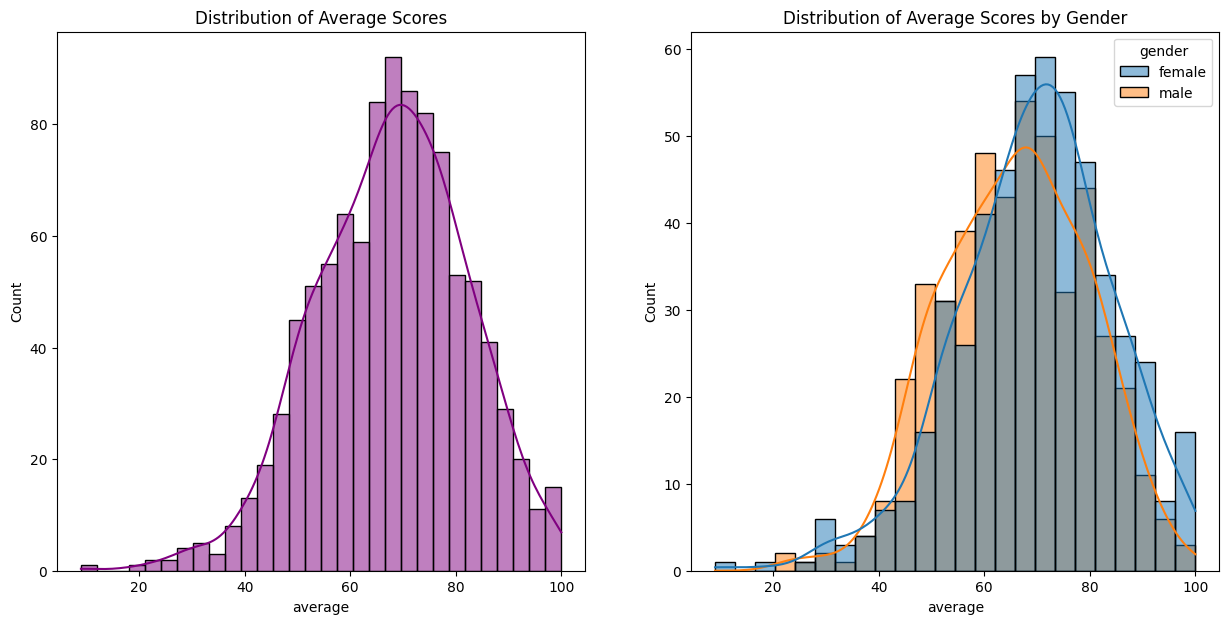

<Figure size 640x480 with 0 Axes>

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
plt.title('Distribution of Average Scores')
sns.histplot(data=df,x='average',bins=30,kde=True,color='purple')
plt.subplot(122)
plt.title('Distribution of Average Scores by Gender')
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()
plt.tight_layout()  


**Insights**
* Female students tend to perform well then male students.

Text(0.5, 1.0, 'Male Students')

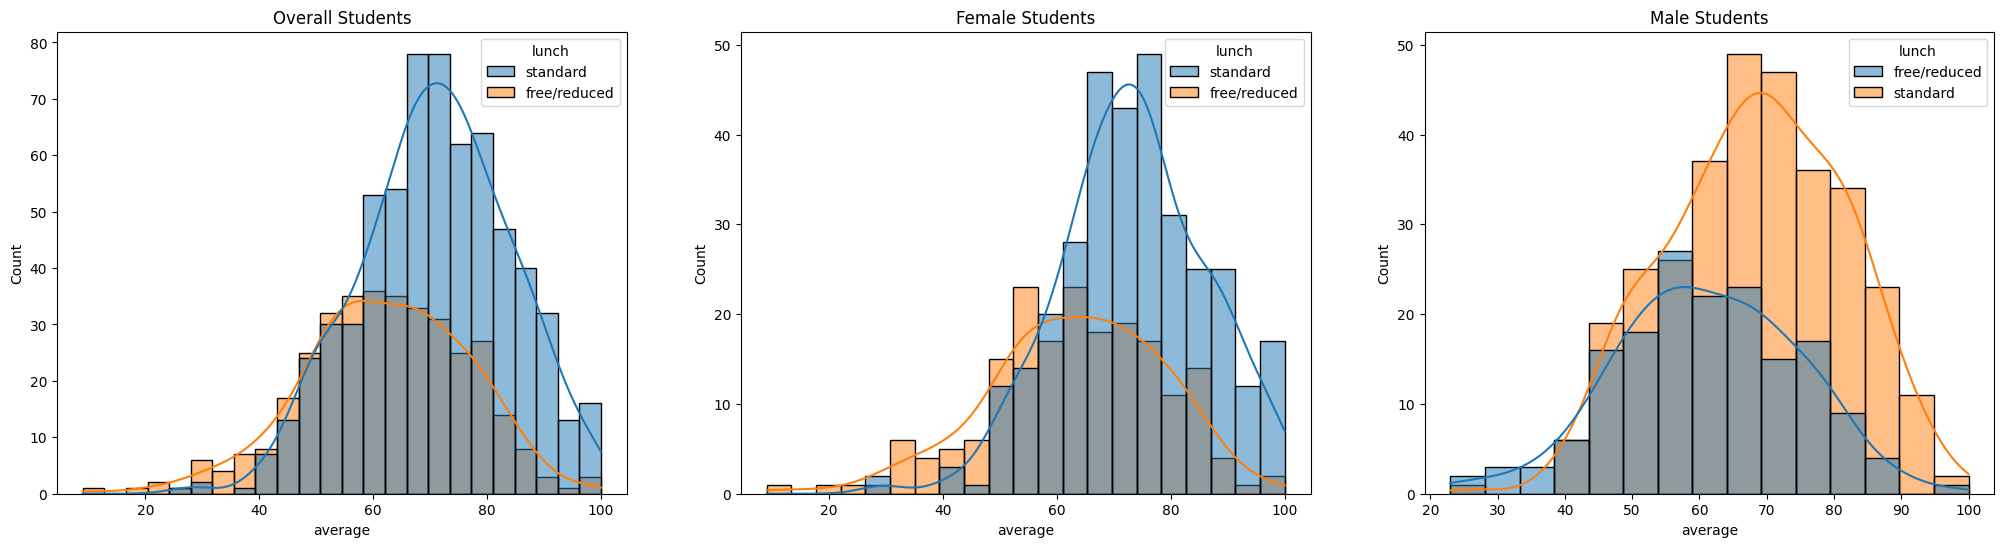

In [18]:
# Create a figure with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(25, 6))

# Graph 1: Overall distribution
sns.histplot(data=df, x='average', kde=True, hue='lunch', ax=axs[0])
axs[0].set_title('Overall Students')

# Graph 2: Female students
sns.histplot(data=df[df['gender'] == 'female'], x='average', kde=True, hue='lunch', ax=axs[1])
axs[1].set_title('Female Students')

# Graph 3: Male students
sns.histplot(data=df[df['gender'] == 'male'], x='average', kde=True, hue='lunch', ax=axs[2])
axs[2].set_title('Male Students')

**Insights**
* Standard lunch helps perform well in exams for both male and female.

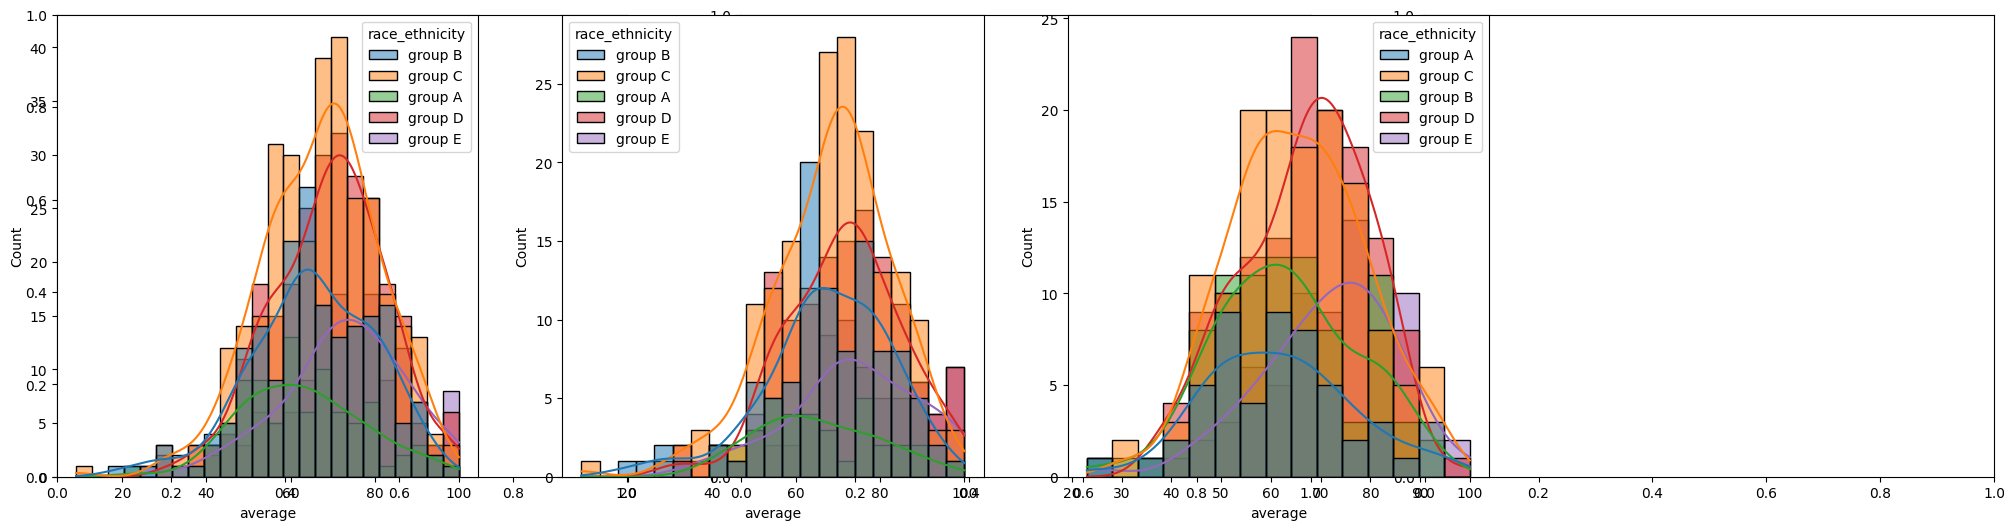

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

***Maximumum score of students in all three subjects***

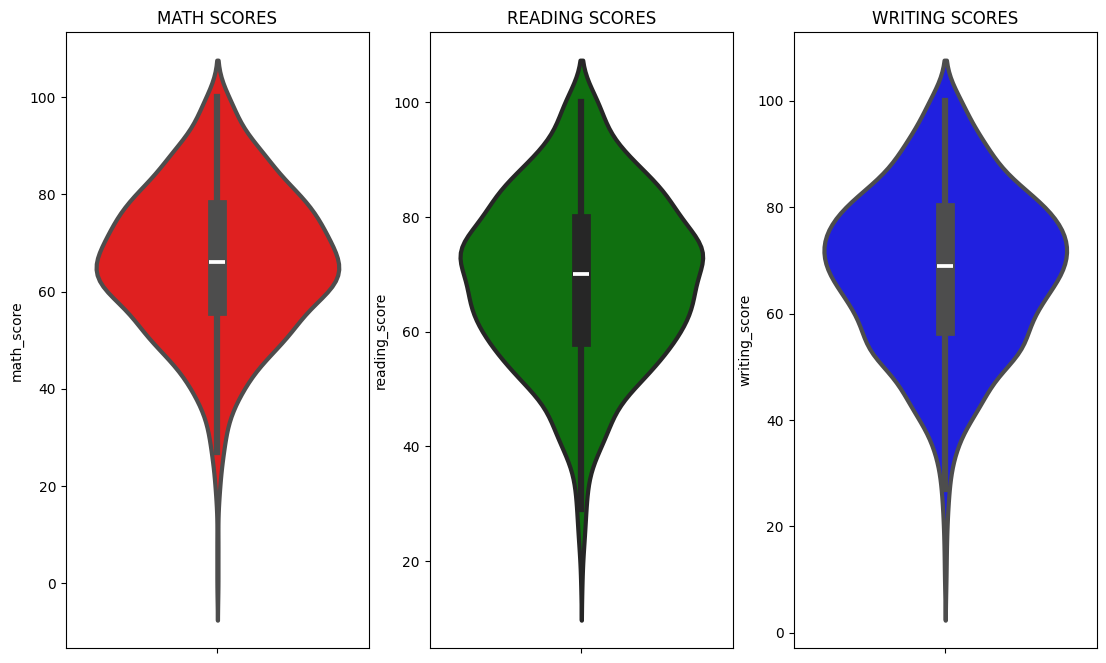

In [20]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

**Insights**
* From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

#### Multivariate analysis using pieplot

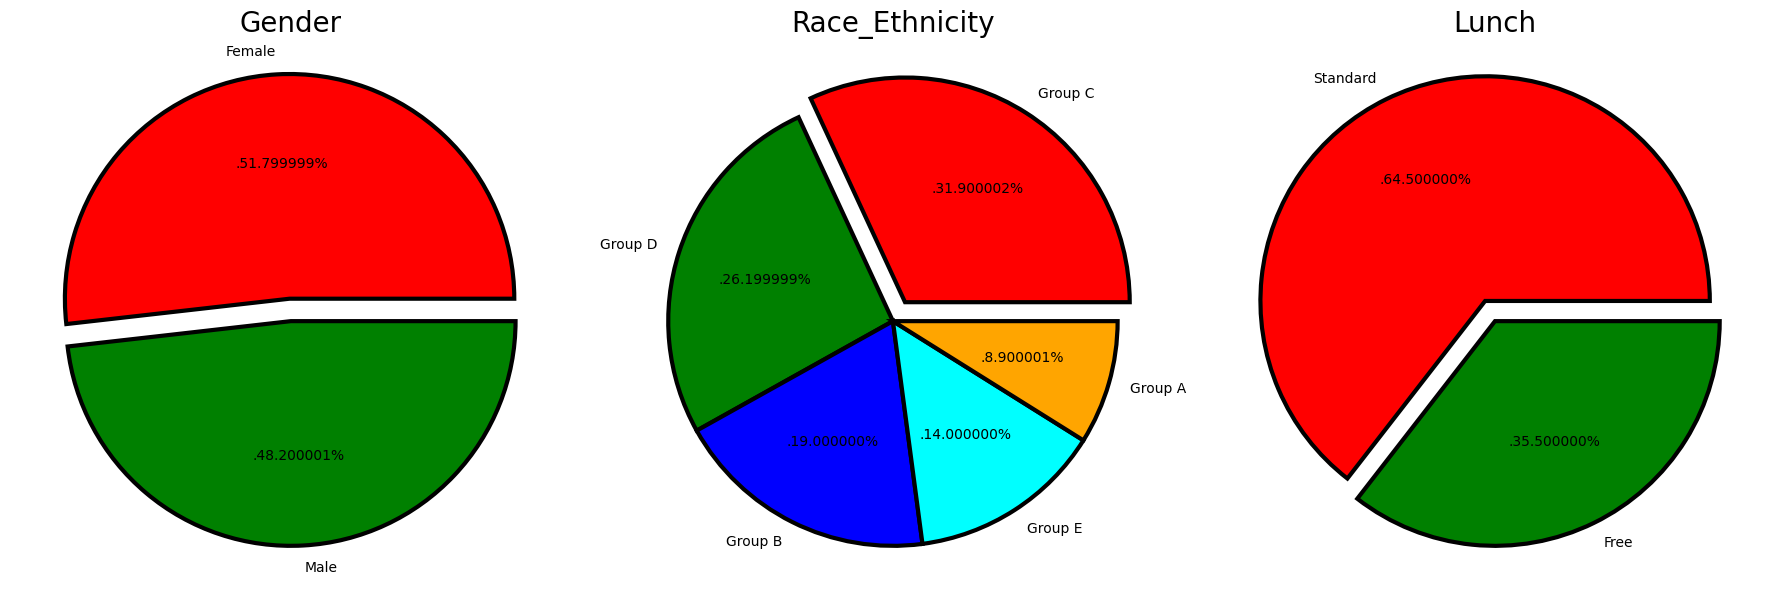

In [21]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%' ,explode=[0.1,0], wedgeprops={'edgecolor': 'black', 'linewidth': 3})
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%',explode=[0.1,0,0,0,0], wedgeprops={'edgecolor': 'black', 'linewidth': 3})
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%' ,explode=[0.1,0], wedgeprops={'edgecolor': 'black', 'linewidth': 3}) 
plt.title('Lunch', fontsize = 20)
plt.axis('off')




plt.tight_layout()
plt.grid()

plt.show()

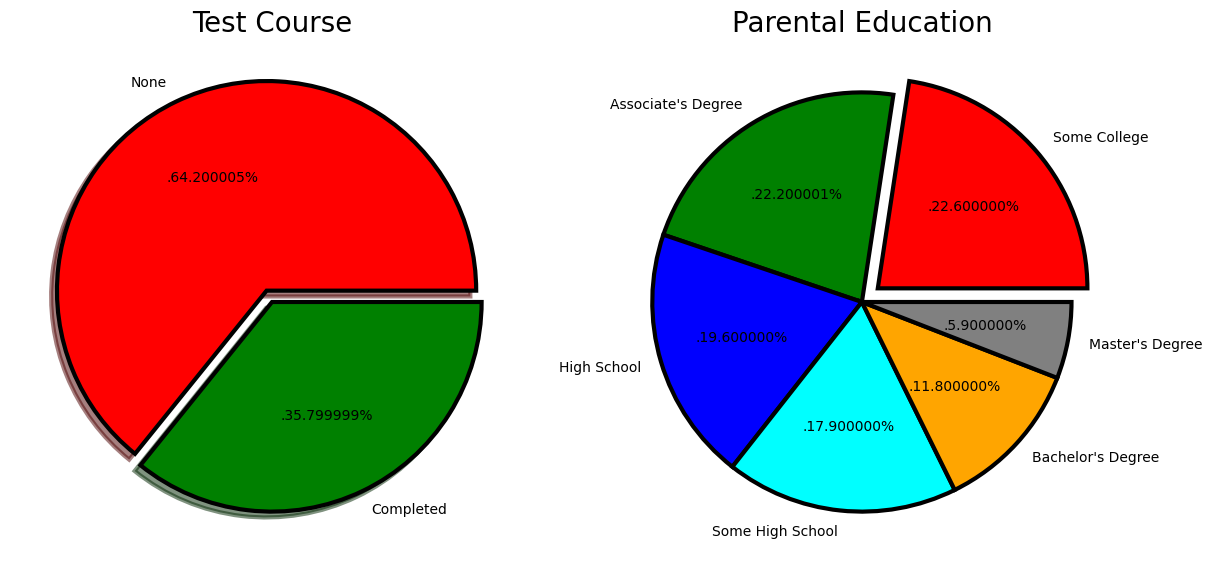

In [22]:
plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%',explode=[0.06,0], shadow=True , wedgeprops={'edgecolor': 'black', 'linewidth': 3})
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%' ,explode=[0.1,0,0,0,0,0], wedgeprops={'edgecolor': 'black', 'linewidth': 3})
plt.title('Parental Education', fontsize = 20)
plt.axis('off')
plt.tight_layout()
plt.grid()

plt.show()

***Insights***
* Number of Male and Female students is almost equal
* Number students are greatest in Group C
* Number of students who have standard lunch are greater
* Number of students who have not enrolled in any test preparation course is greater
* Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### Feature Wise Visualization

***GENDER COLUMN***
* How is distribution of Gender ?
* Is gender has any impact on student's performance ?

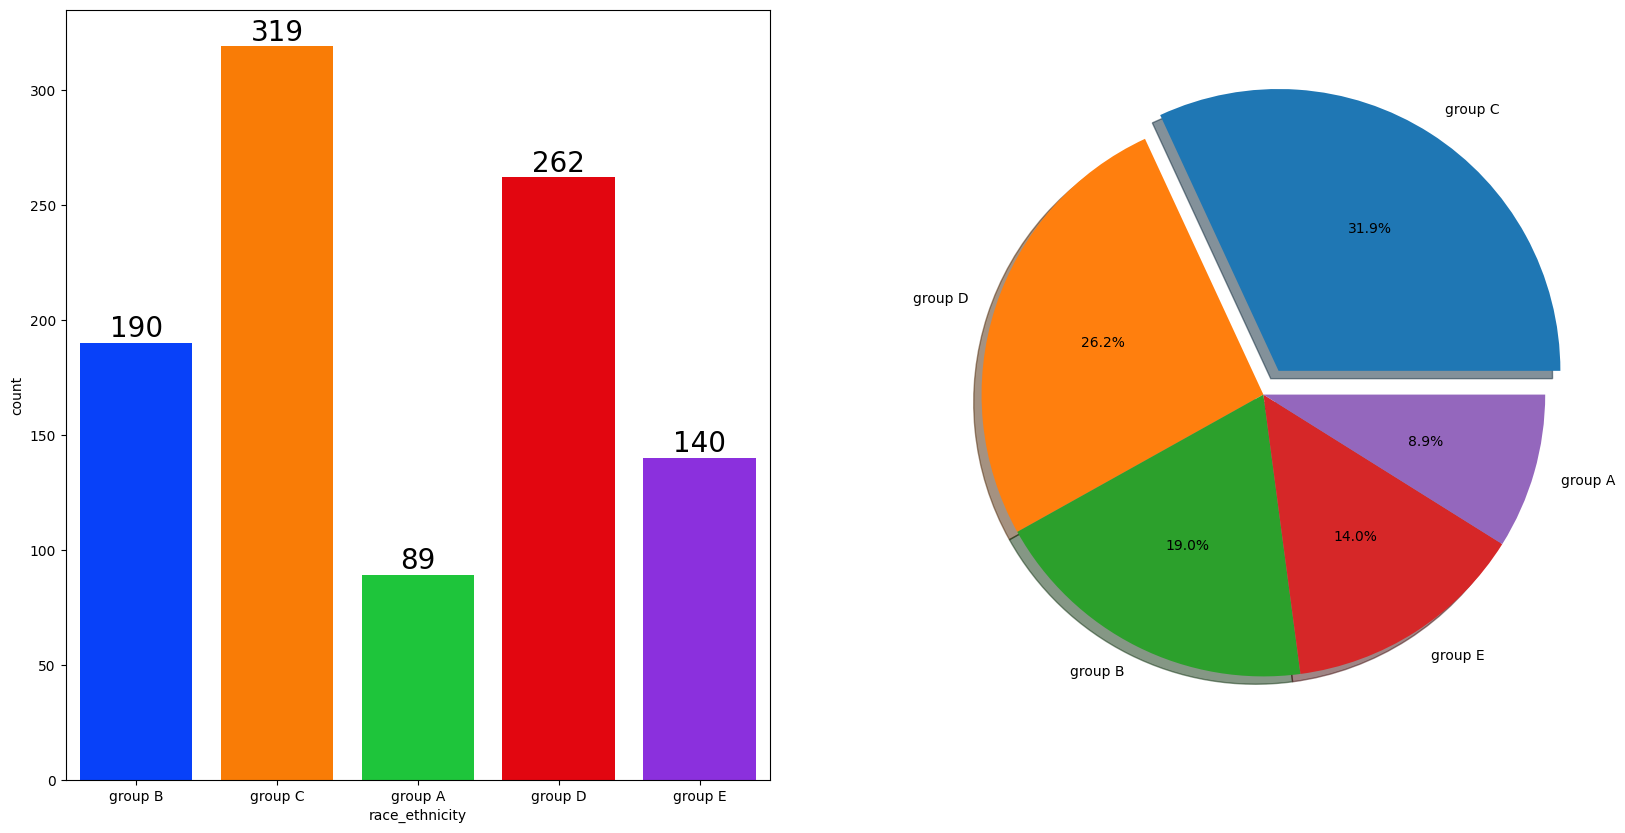

In [23]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   


***Insights***
* Most of the student belonging from group C /group D.
* Lowest number of students belong to groupA.

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

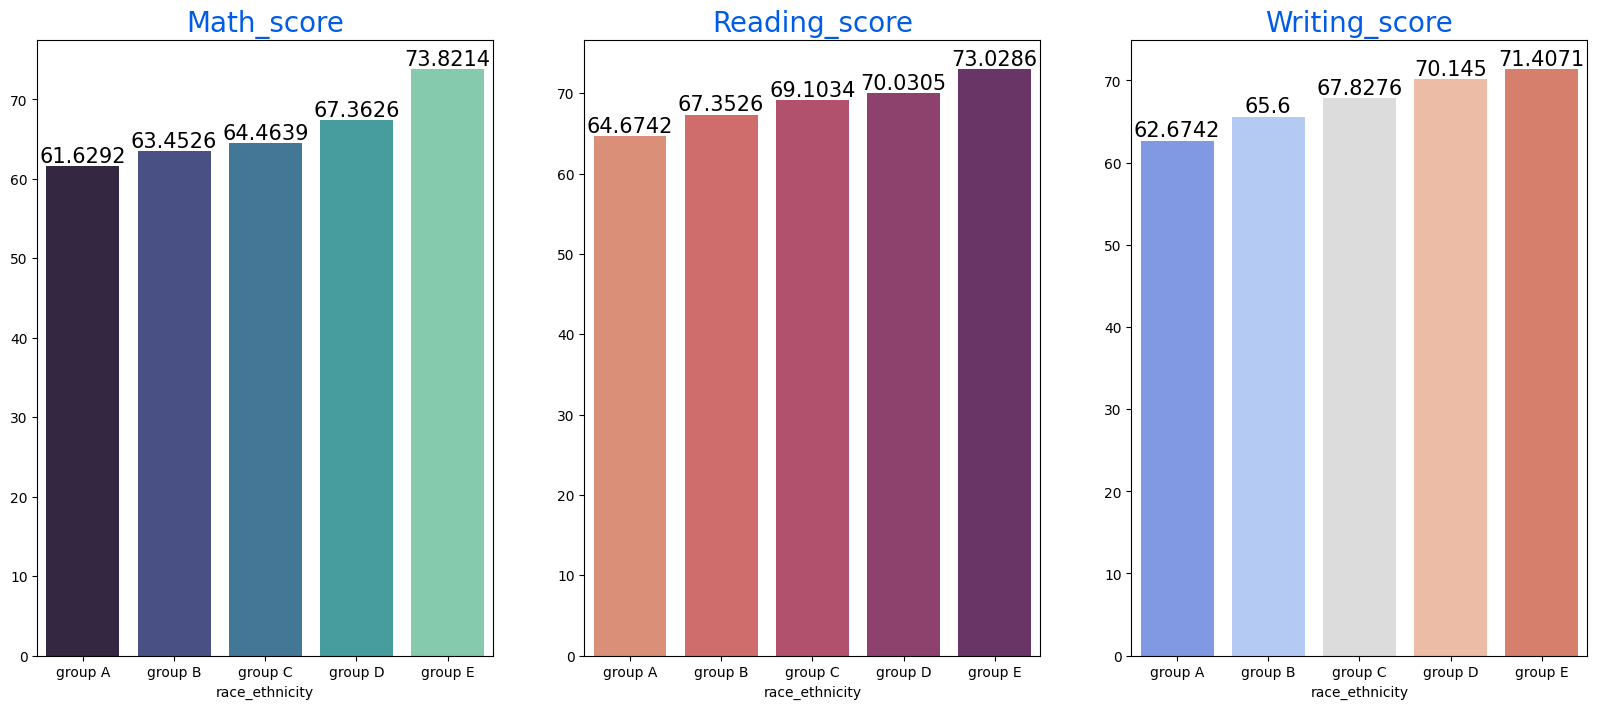

In [24]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math_score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading_score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing_score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

***Insights***
* Group E students have scored the highest marks.
* Group A students have scored the lowest marks.
* Students from a lower Socioeconomic status have a lower avg in all course subjects

***PARENTAL LEVEL OF EDUCATION COLUMN***
* What is educational background of student's parent ?
* Is parental education has any impact on student's performance ?

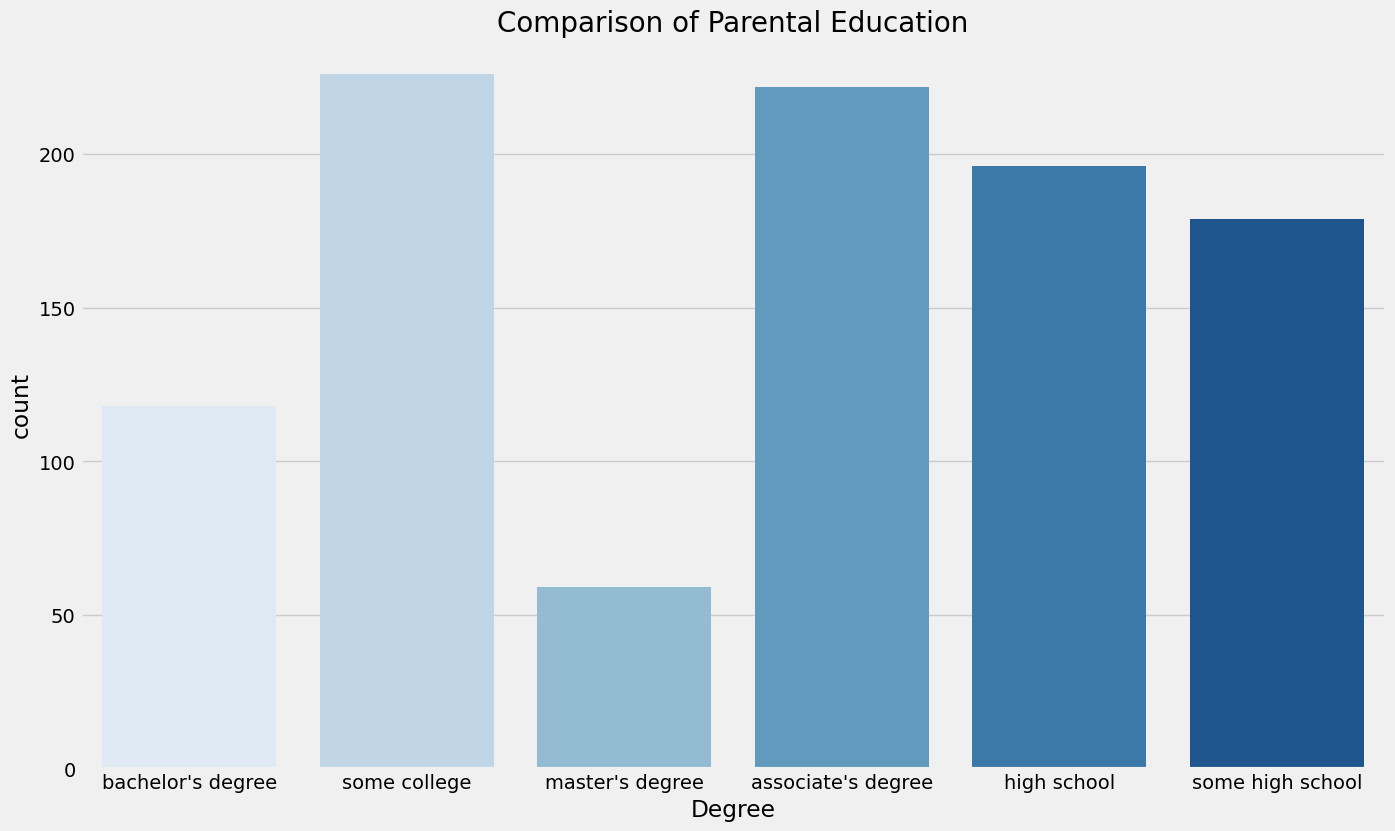

In [25]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(x=df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

****Insights***
* Largest number of parents are from some college.

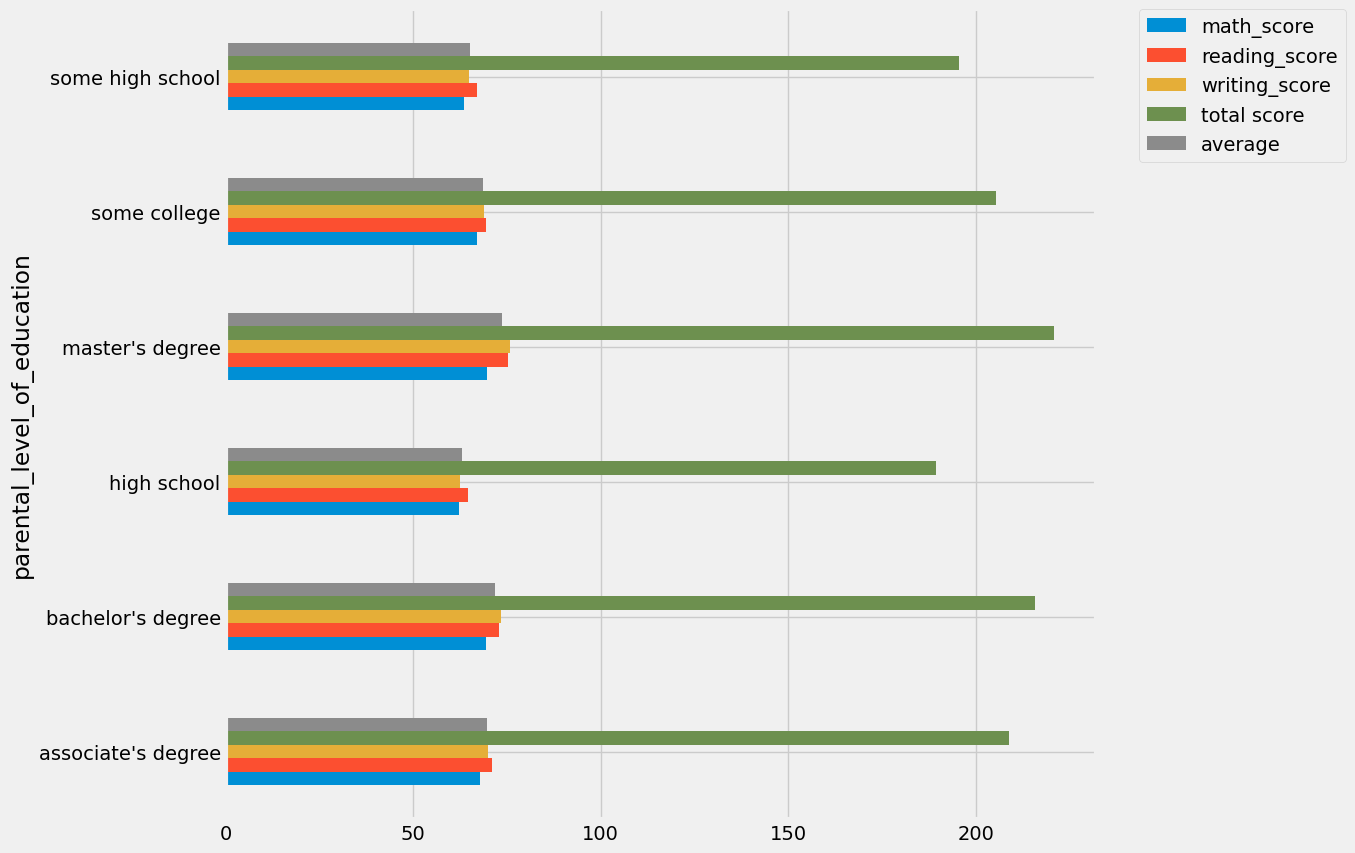

In [ ]:

# Use .mean(numeric_only=True) instead of .agg('mean') to handle non-numeric columns automatically
df.groupby('parental_level_of_education').mean(numeric_only=True).plot(kind='barh', figsize=(10, 10))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


***Insights***
* The score of student whose parents possess master and bachelor level education are higher than others.

***LUNCH COLUMN***
* Which type of lunch is most common amoung students ?
* What is the effect of lunch type on test results?

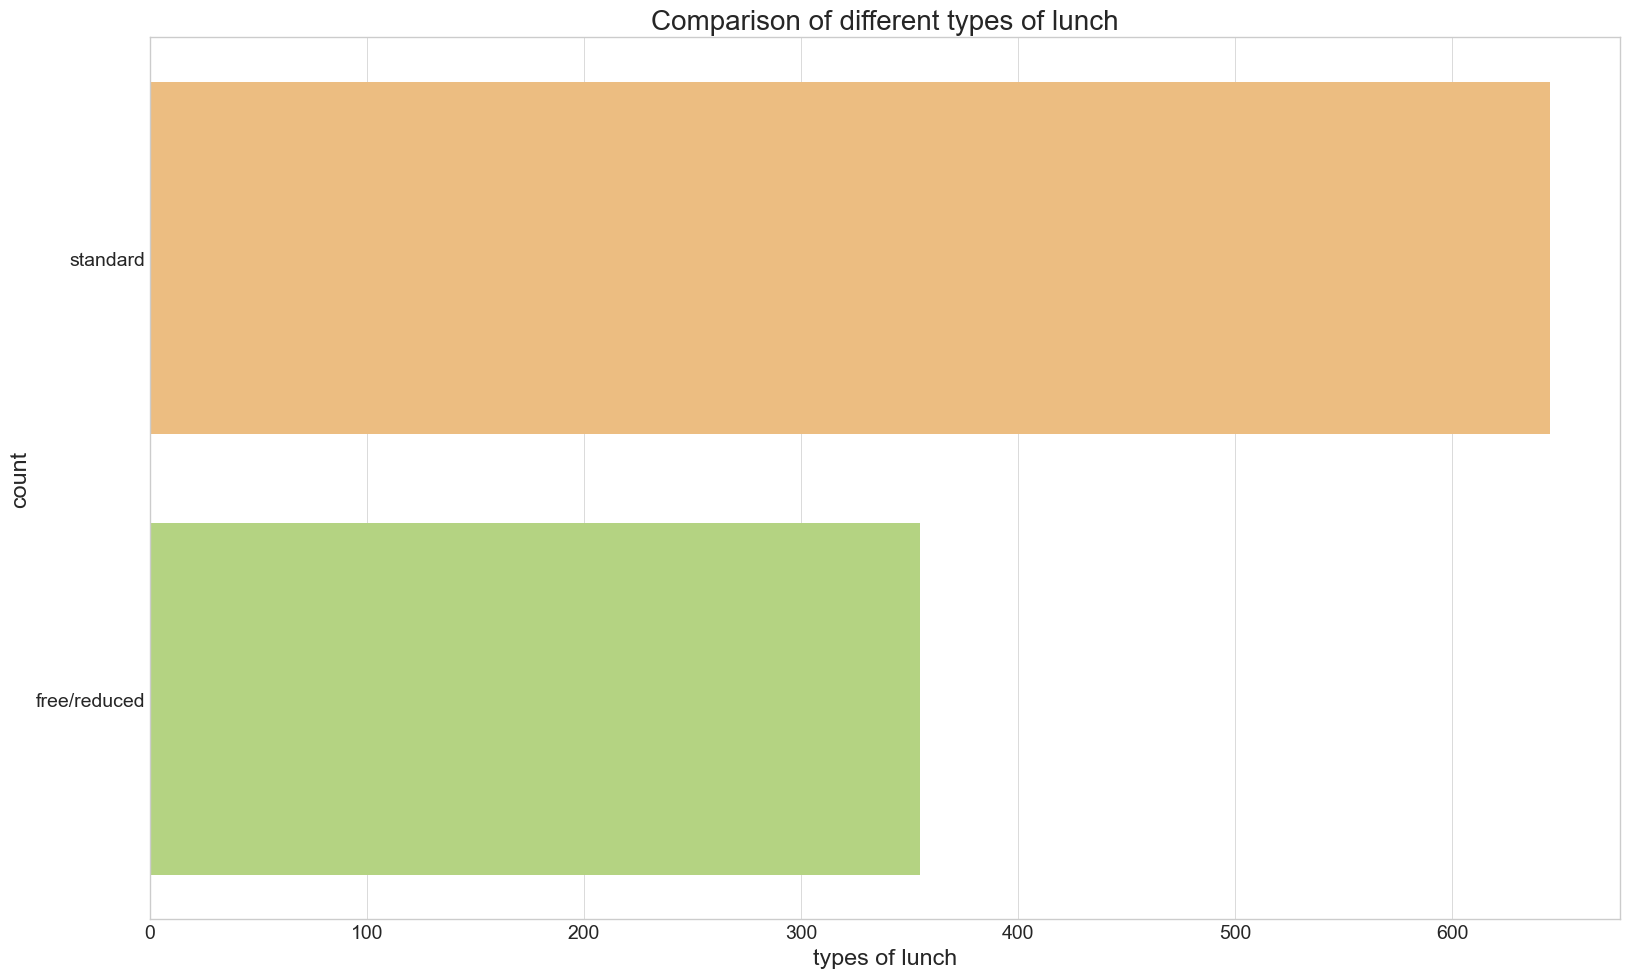

In [48]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-v0_8-whitegrid')  # or 'seaborn-v0_8-white' or 'default'
sns.countplot(df['lunch'], palette = 'RdYlGn')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

***Insights***
* Students being served Standard lunch was more than free lunch

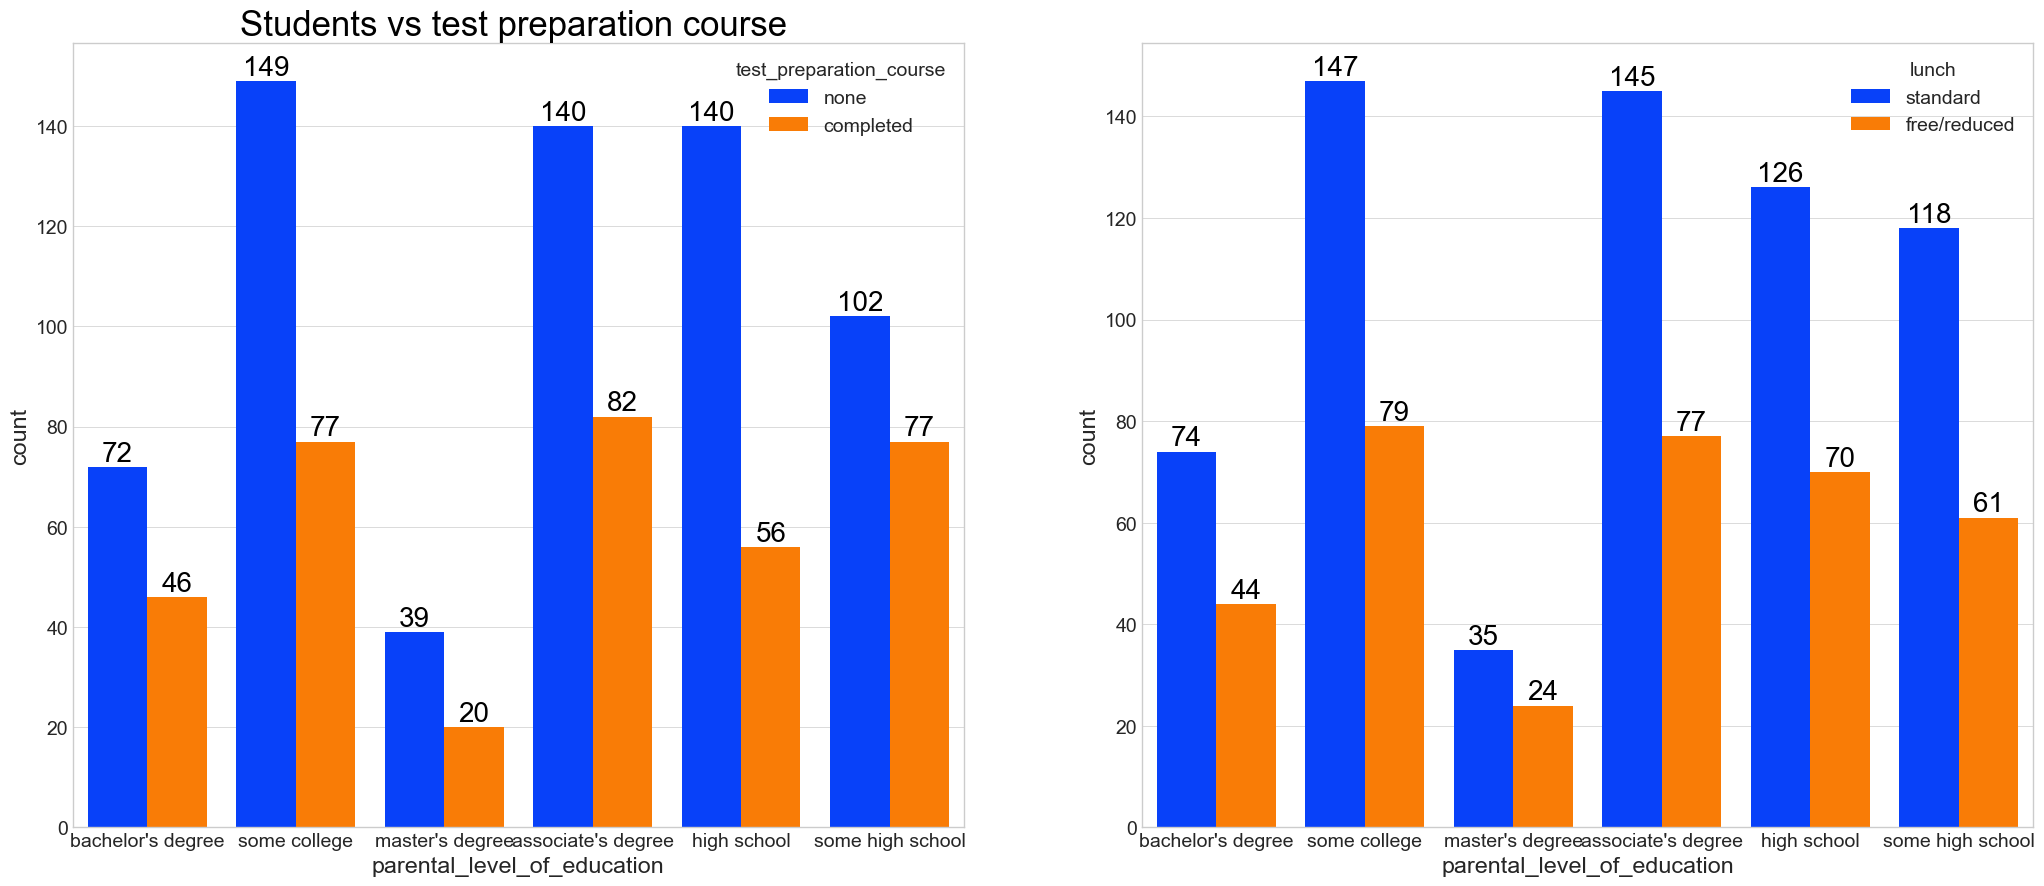

In [49]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20) 

***Insights***
* Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

***TEST PREPARATION COURSE COLUMN***
* Which type of lunch is most common amoung students ?
* Is Test prepration course has any impact on student's performance ?

<Axes: xlabel='lunch', ylabel='writing_score'>

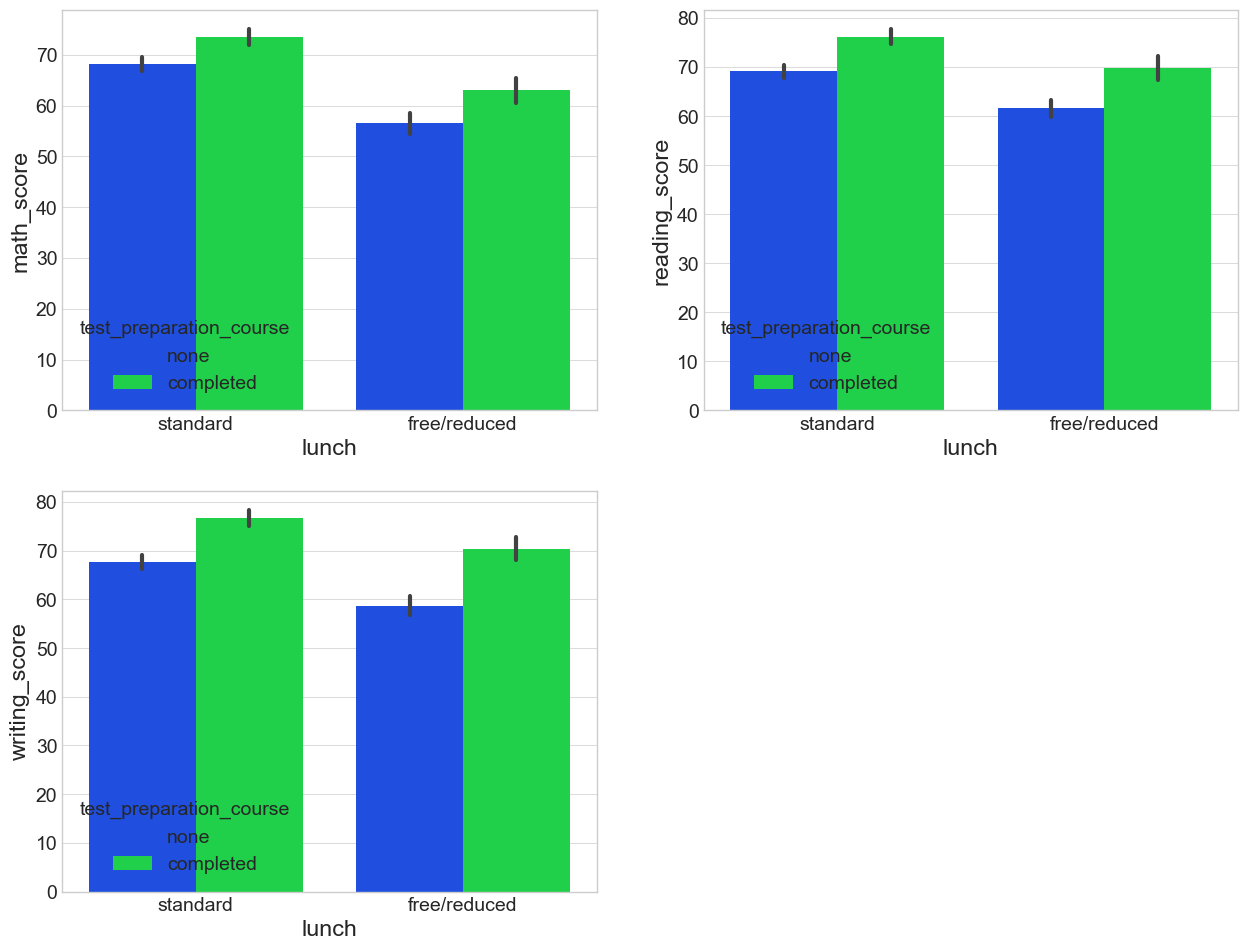

In [54]:
plt.figure(figsize=(12,9))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

***Insights***
>Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### CHECKING OUTLIERS

<Axes: ylabel='reading_score'>

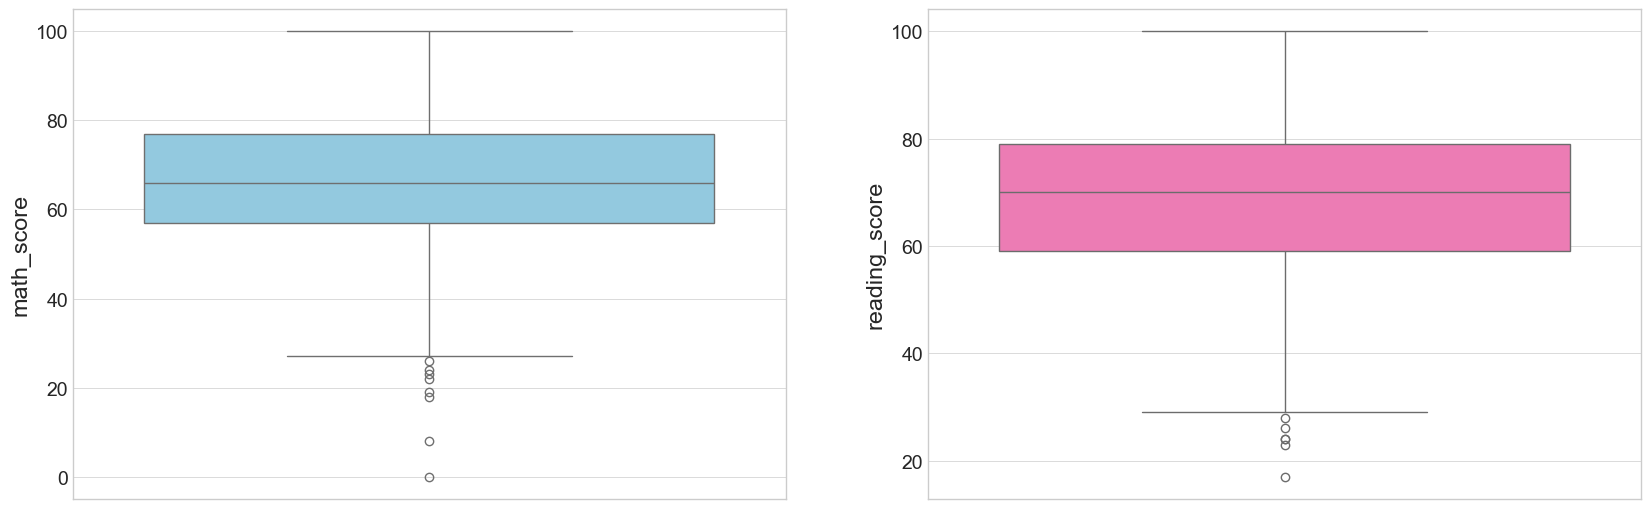

In [58]:
plt.subplots(1,2,figsize=(16,5))
plt.subplot(121)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(122)
sns.boxplot(df['reading_score'],color='hotpink')


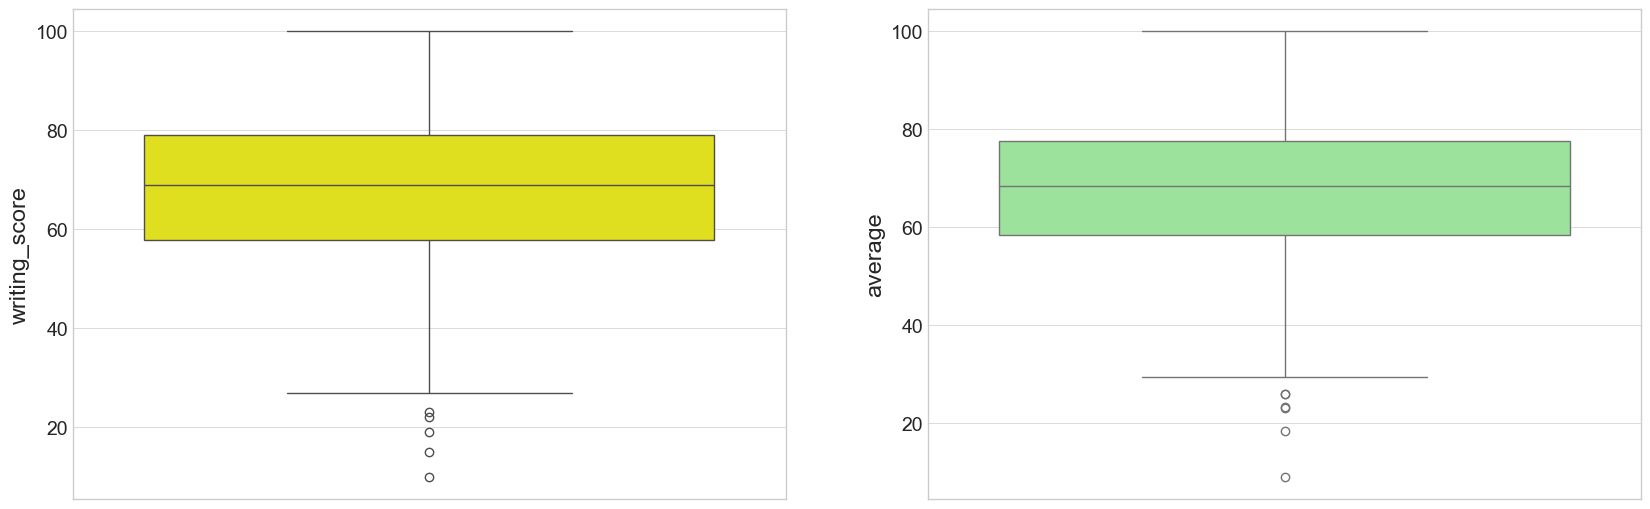

In [59]:
plt.subplots(1,2,figsize=(16,5))
plt.subplot(121)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(122)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### MUTIVARIATE ANALYSIS USING PAIRPLOT

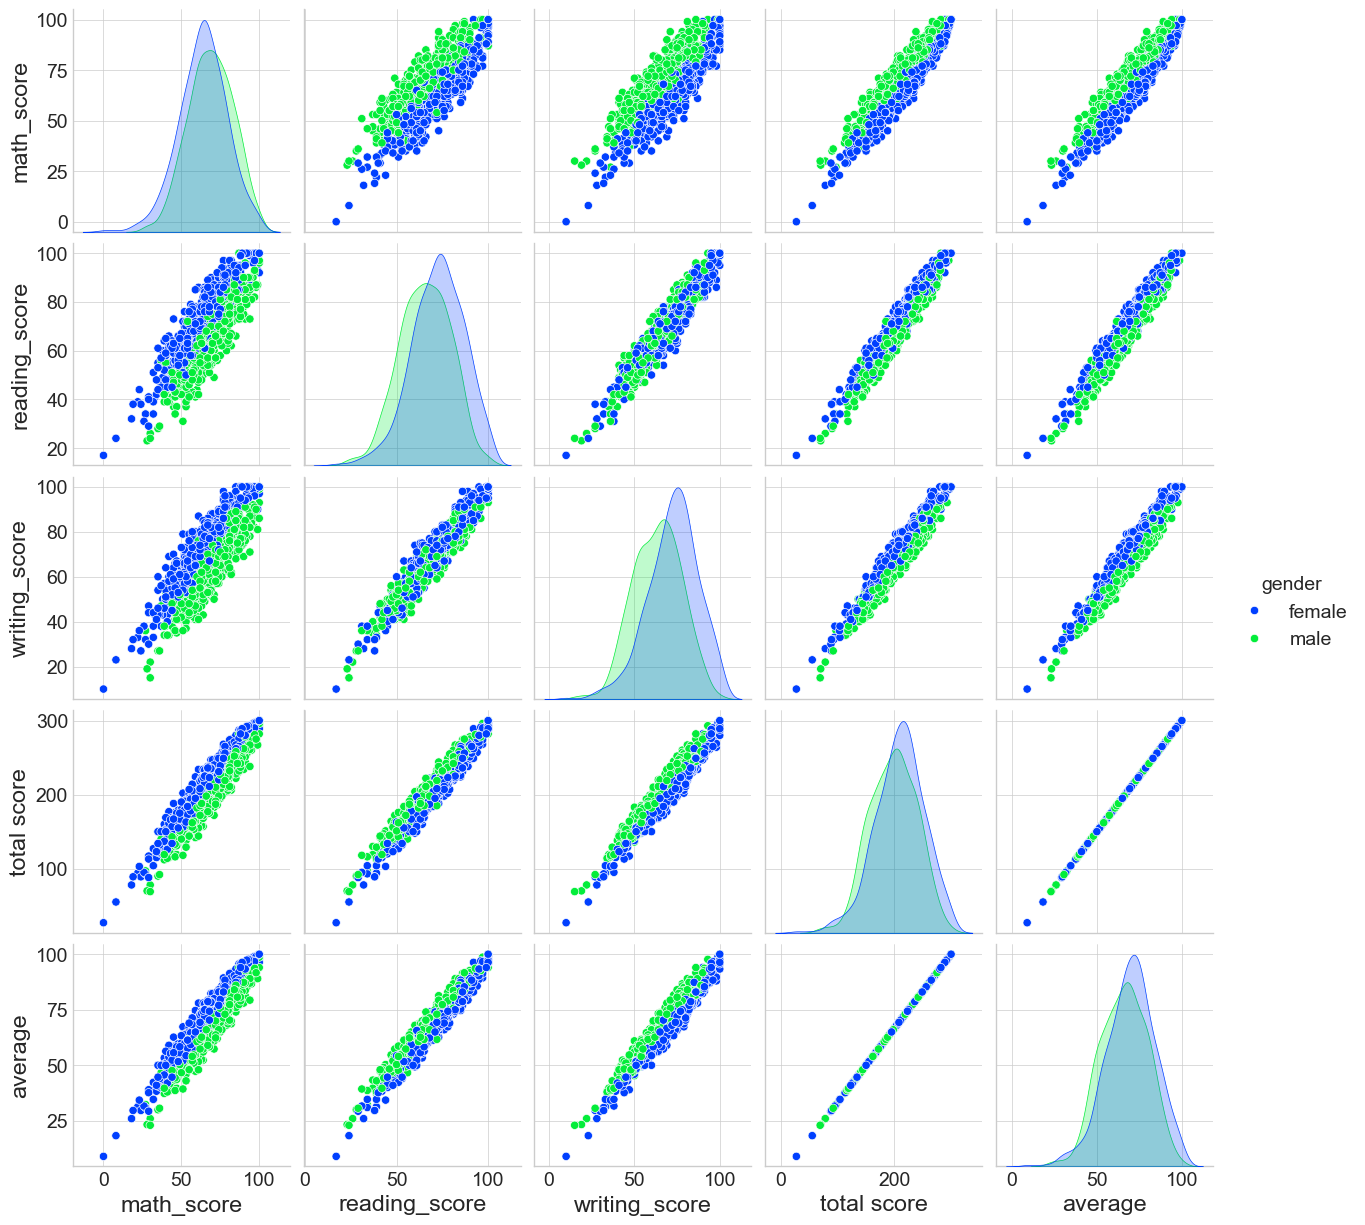

In [60]:
sns.pairplot(df,hue = 'gender')
plt.show()

***Insights***
>From the above plot it is clear that all the scores increase linearly with each other.

### Conclusions
* Student's Performance is related with lunch, race, parental level education
* Females lead in pass percentage and also are top-scorers
* Student's Performance is not much related with test preparation course
* Finishing preparation course is benefitial.